In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


##### *Basic library imports*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Train Data


In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Feature Extraction

### drop duplicate/unimportant features. 
##### *Columns "Ticket" & "Fare" duplicate the information of "Pclass", so we can drop those 2 features*
##### *Column "Embarked" does not provide any vital information to our target, Column "Cabin" has mostly missing values, so we can drop them too!*

In [5]:
train = train.drop(["Name", "Ticket", "Fare", "Embarked", "Cabin"], axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


# Train data cleaning & preprocessing

### check for Null values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

### fill null values in Age 
##### *calc avg age of men, women and fill in the null values*

In [7]:
female = (train["Sex"] == "female")
female.sum()
avg_age_female = (train[female]["Age"].mean())
round(avg_age_female,1) 
train_female = (train[female]["Age"]).fillna(value=avg_age_female)
train_female.astype('int')

1      38
2      26
3      35
8      27
9      14
       ..
880    25
882    22
885    39
887    19
888    27
Name: Age, Length: 314, dtype: int64

In [8]:
male = (train["Sex"] == "male")
male.sum()
avg_age_male = (train[male]["Age"].mean())
round(avg_age_male,1) 
train_male = (train[male]["Age"]).fillna(value=avg_age_male)
train_male.astype('int')

0      22
4      35
5      30
6      54
7       2
       ..
883    28
884    25
886    27
889    26
890    32
Name: Age, Length: 577, dtype: int64

##### *concat male, female in Age column*

In [9]:
train["Age"] = pd.concat([train_female, train_male])
train["Age"] = train["Age"].astype('int')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22,1,0
1,2,1,1,female,38,1,0
2,3,1,3,female,26,0,0
3,4,1,1,female,35,1,0
4,5,0,3,male,35,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0
887,888,1,1,female,19,0,0
888,889,0,3,female,27,1,2
889,890,1,1,male,26,0,0


In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

# Exploratory Data Analysis

##### *Pairwise relationships in train data*

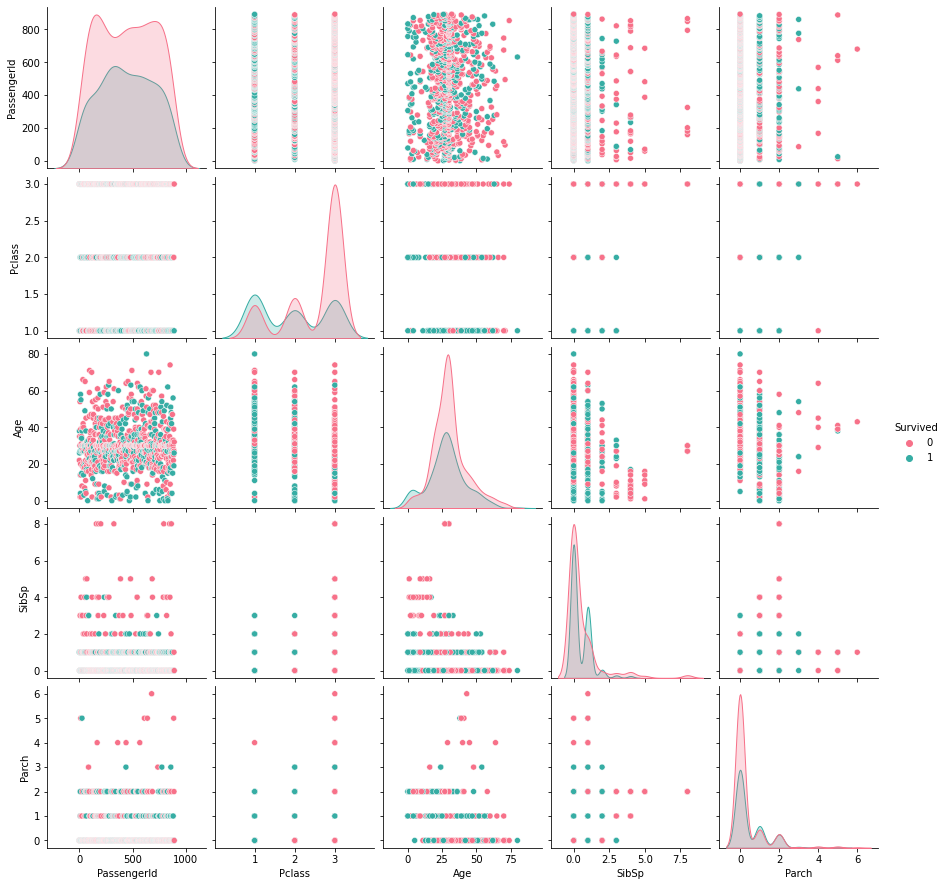

In [11]:
sns.pairplot(train, hue = "Survived", palette = 'husl')

<AxesSubplot:xlabel='Survived', ylabel='Count'>

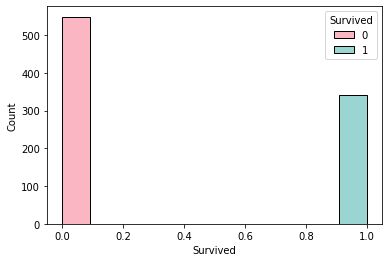

In [12]:
sns.histplot(data=train, x="Survived", hue = "Survived", palette = 'husl')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

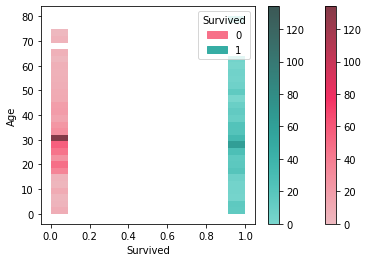

In [13]:
sns.histplot(data=train, y="Age", x="Survived", hue = "Survived", cbar=True, palette = 'husl')

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

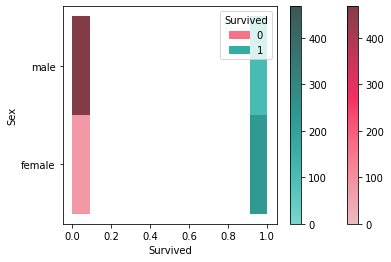

In [14]:
sns.histplot(data=train, y="Sex", x="Survived", hue = "Survived", cbar=True, palette = 'husl')

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

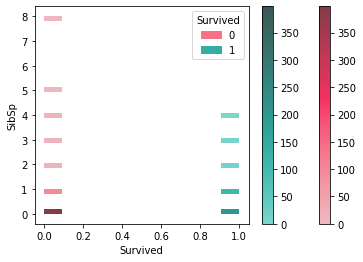

In [15]:
sns.histplot(data=train, y="SibSp", x="Survived", hue = "Survived", cbar=True, palette = 'husl')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

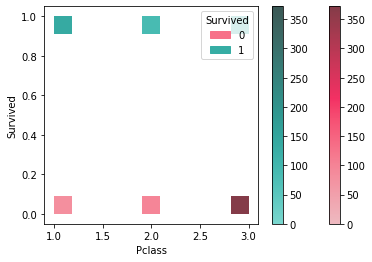

In [16]:
sns.histplot(data=train, x="Pclass", y="Survived", hue = "Survived", cbar=True, palette = 'husl')

### Encoding categorical features on train data

In [17]:
train_encoded = pd.get_dummies(train)
train = train_encoded
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,0,3,22,1,0,0,1
1,2,1,1,38,1,0,1,0
2,3,1,3,26,0,0,1,0
3,4,1,1,35,1,0,1,0
4,5,0,3,35,0,0,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,0,1
887,888,1,1,19,0,0,1,0
888,889,0,3,27,1,2,1,0
889,890,1,1,26,0,0,0,1


### Our Features and Target 
##### *X is the feature data set, y is the target variable*

In [18]:
X = train.drop(["Survived"], axis = 1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,3,22,1,0,0,1
1,2,1,38,1,0,1,0
2,3,3,26,0,0,1,0
3,4,1,35,1,0,1,0
4,5,3,35,0,0,0,1
...,...,...,...,...,...,...,...
886,887,2,27,0,0,0,1
887,888,1,19,0,0,1,0
888,889,3,27,1,2,1,0
889,890,1,26,0,0,0,1


In [19]:
y = train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Preprocessing Standardisation
##### *Standardising the features*

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(891, 7)

# Train and Validation sets
##### *Splitting train set into train set and validation set for testing performance within train data*

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Validation

##### *The train set is Cross validated on various classification models like LogisticRegression, Kneighbors classifier, Support Vector Machines, DecisionTree Classifier, Random Forest Classifier, Naive Bayes Classifier & Gradient Boosting Classifier*

##### *Selecting Support Vector Machine model based on the best performance on our training set, other good performers are Naive Bayes and Gradient Boosting Classifier models!*

# Hyperparameter Tuning

##### *Tuning the 'C' and 'gamma' parameters using Gridsearch, 'C' reduces error & 'gamma' decides the decision boundry* 

In [22]:
from sklearn.svm import SVC 
svc = SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1,1, 10], 
    'gamma': [1,0.1,0.01],
   }
grid = GridSearchCV(svc,param_grid,refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]})

In [23]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [24]:
grid.best_score_

0.8201418300009848

In [25]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015765,0.000430,0.004842,0.000161,0.1,1,"{'C': 0.1, 'gamma': 1}",0.671329,0.678322,0.697183,0.697183,0.683099,0.685423,0.010306,9
1,0.012173,0.000073,0.003629,0.000052,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.818182,0.825175,0.788732,0.767606,0.830986,0.806136,0.024135,4
2,0.014808,0.000456,0.004688,0.000098,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.797203,0.811189,0.767606,0.760563,0.823944,0.792101,0.024491,7
3,0.016417,0.000464,0.004220,0.000085,1,1,"{'C': 1, 'gamma': 1}",0.811189,0.825175,0.802817,0.767606,0.830986,0.807554,0.022321,3
4,0.011956,0.000282,0.003093,0.000147,1,0.1,"{'C': 1, 'gamma': 0.1}",0.853147,0.846154,0.788732,0.788732,0.823944,0.820142,0.027399,1
5,0.011462,0.000179,0.003112,0.000088,1,0.01,"{'C': 1, 'gamma': 0.01}",0.797203,0.811189,0.767606,0.767606,0.830986,0.794918,0.024750,6
6,0.025437,0.002329,0.004023,0.000124,10,1,"{'C': 10, 'gamma': 1}",0.769231,0.790210,0.732394,0.697183,0.795775,0.756959,0.037254,8
7,0.017719,0.001166,0.003179,0.000246,10,0.1,"{'C': 10, 'gamma': 0.1}",0.825175,0.839161,0.795775,0.802817,0.809859,0.814557,0.015689,2
8,0.012389,0.000623,0.003072,0.000073,10,0.01,"{'C': 10, 'gamma': 0.01}",0.797203,0.818182,0.781690,0.760563,0.830986,0.797725,0.025152,5


[Text(0.5, 0, 'gamma'), Text(0, 0.5, 'Mean Test Score')]

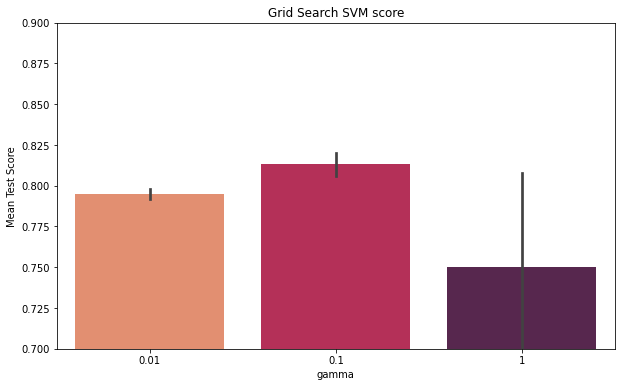

In [26]:
f,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = grid.cv_results_, x = 'param_gamma', y = 'mean_test_score', ax=ax, palette = 'rocket_r')
ax.set(ylim=(0.7, 0.9))
ax.set(title="Grid Search SVM score")
ax.set(xlabel="gamma", ylabel="Mean Test Score")

### Our final tuned model to fit our test data!

In [27]:
model = grid.best_estimator_

# Model Evaluation

# Classification Report & Confusion Matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [29]:
cn_matrix = confusion_matrix(y_val, y_pred, labels = [0,1])
cn_matrix

array([[92, 13],
       [20, 54]])

Text(0.5, 1.0, 'Confusion Matrix')

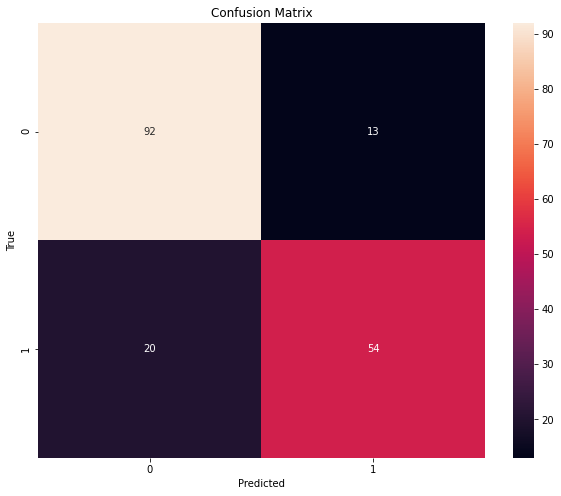

In [30]:
f, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")


### Area under the ROC Curve is 0.80, it shows that our model gives a good performance

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

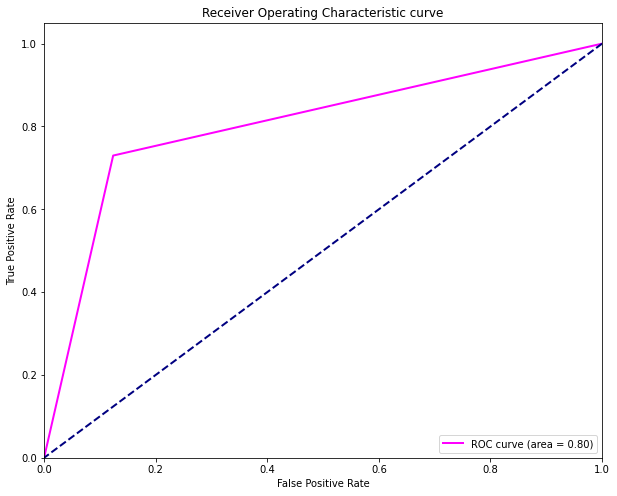

In [32]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'magenta', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

### Test Data


In [33]:
test= pd.read_csv("/kaggle/input/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Test Data cleaning & preprocessing

In [34]:
test = test.drop(["Name", "Ticket", "Fare", "Embarked", "Cabin"], axis=1)
test


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,NaN,0,0


In [35]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [36]:
female = (test["Sex"] == "female")
female.sum()
avg_age_female = (test[female]["Age"].mean())
round(avg_age_female,1) 
test_female = (test[female]["Age"]).fillna(value=avg_age_female)
test_female.astype('int')

1      47
4      22
6      30
8      18
12     23
       ..
409     3
410    30
411    37
412    28
414    39
Name: Age, Length: 152, dtype: int64

In [37]:
male = (test["Sex"] == "male")
male.sum()
avg_age_male = (test[male]["Age"].mean())
round(avg_age_male,1) 
test_male = (test[male]["Age"]).fillna(value=avg_age_male)
test_male.astype('int')

0      34
2      62
3      27
5      14
7      26
       ..
407    50
413    30
415    38
416    30
417    30
Name: Age, Length: 266, dtype: int64

In [38]:
test["Age"] = pd.concat([test_female, test_male])
test["Age"] = test["Age"].astype('int')
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34,0,0
1,893,3,female,47,1,0
2,894,2,male,62,0,0
3,895,3,male,27,0,0
4,896,3,female,22,1,1
...,...,...,...,...,...,...
413,1305,3,male,30,0,0
414,1306,1,female,39,0,0
415,1307,3,male,38,0,0
416,1308,3,male,30,0,0


In [39]:
test_encoded = pd.get_dummies(test)
test_encoded


,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,892,3,34,0,0,0,1
1,893,3,47,1,0,1,0
2,894,2,62,0,0,0,1
3,895,3,27,0,0,0,1
4,896,3,22,1,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,30,0,0,0,1
414,1306,1,39,0,0,1,0
415,1307,3,38,0,0,0,1
416,1308,3,30,0,0,0,1


In [40]:
test = scaler.transform(test_encoded)
test.shape

(418, 7)

# Evaluate test data

In [41]:
model.fit(X, y)
target = model.predict(test)
target

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Target prediction

In [42]:
df = pd.DataFrame(np.array(target), columns=["Survived"])
df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [43]:
gendersubmission = pd.read_csv("../input/titanic/gender_submission.csv")

In [44]:
df[["PassengerId"]] = gendersubmission.PassengerId
output = df[["PassengerId", "Survived", ]]
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
output.to_csv('Submission.csv', index=False)
